In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
from scipy.stats import multivariate_normal

In [3]:
roottwo = 1/math.pow(2,.5)
U = np.array([[roottwo, -roottwo], [roottwo, roottwo]])
lam1 = np.array([[4, 0], [0, 1]])
lam2 = np.array([[1, 0], [0,5]])
rv1 = multivariate_normal(mean = [1, 0], cov = np.matmul(U, np.matmul(lam1,U.transpose())))
rv2 = multivariate_normal(mean = [-1, 0], cov = np.matmul(U, np.matmul(lam2,U.transpose())))
rv3 = multivariate_normal(mean = [0, -10], cov = np.identity(2))

In [4]:
RV1 = rv1.rvs(1000).transpose()
RV2 = rv2.rvs(1000).transpose()
RV3 = rv3.rvs(1000).transpose()


print(RV1.shape)

(2, 1000)


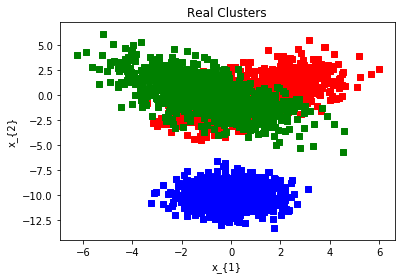

In [5]:
fig = plt.figure()
f = fig.add_subplot(111)
f.set_title('Real Clusters')
f.set_xlabel('x_{1}')
f.set_ylabel('x_{2}')

f.scatter(RV1[0,:], RV1[1,:], color='r', marker='s')
f.scatter(RV2[0,:], RV2[1,:], color='g', marker='s')
f.scatter(RV3[0,:], RV3[1,:], color='b', marker='s')

In [6]:
#Assuming that we are using the Euclidean distance as the metric


data = np.concatenate((RV1, RV2, RV3), axis = 1)
print(data.shape)
init = np.random.randint(3, size = (3000,))
#print(init)
flag = 1
while flag==1:
    flag = 0
    #print((init==0).tolist())
    #print(data[:,(init==0).tolist()])
    mean0 = np.mean(data[:,(init==0).tolist()], axis=1)
    mean1 = np.mean(data[:,(init==1).tolist()], axis=1)
    mean2 = np.mean(data[:,(init==2).tolist()], axis=1)
    #print(mean0)
    #print(mean1)
    #print(mean2)
    counter = 0
    for pt in data.transpose():
        #print(pt)
        #print([np.linalg.norm(pt- mean0,2), np.linalg.norm(pt- mean1,2), np.linalg.norm(pt- mean2,2)])
        #print(np.argmin(np.array([np.linalg.norm(pt, mean0,2), np.linalg.norm(pt, mean1,2), np.linalg.norm(pt, mean2,2)])))
        cluster = np.argmin(np.array([np.linalg.norm(pt- mean0,2), np.linalg.norm(pt-mean1,2), np.linalg.norm(pt-mean2,2)]))
        if init[counter] != cluster:
            flag = 1
        init[counter] = cluster
        counter = counter + 1
print('done')

(2, 3000)
done


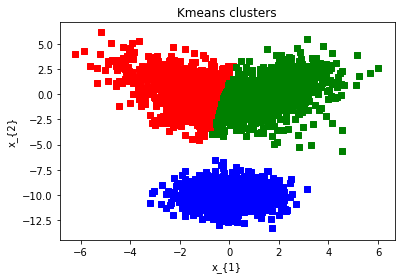

In [7]:
fig = plt.figure()
f = fig.add_subplot(111)
f.set_title('Kmeans clusters')
f.set_xlabel('x_{1}')
f.set_ylabel('x_{2}')

f.scatter(data[:,(init==0).tolist()][0], data[:,(init==0).tolist()][1], color='r', marker='s')
f.scatter(data[:,(init==1).tolist()][0], data[:,(init==1).tolist()][1], color='g', marker='s')
f.scatter(data[:,(init==2).tolist()][0], data[:,(init==2).tolist()][1], color='b', marker='s')